In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
df15 = pd.read_csv('data/SBAC15_micro_246169_20200130_CSV.csv', delimiter=';', decimal=',')
df16 = pd.read_csv('data/SBAC16_micro_266442_20200130_CSV.csv', delimiter=';', decimal=',')
df17 = pd.read_csv('data/SBAC17_micro_627960_20200130_CSV.csv', delimiter=';', decimal=',')
df18 = pd.read_csv('data/SBAC18_micro_556787_20200130_CSV.csv', delimiter=';', decimal=',')
df19 = pd.read_csv('data/SBAC19_micro_514852_20200325_CSV.csv', delimiter=';', decimal=',')
df = pd.concat([df15, df16, df17, df18, df19])
df.head()

/var/folders/hx/fcx4yqw903n270zvkg9tjlqc0000gn/T/ipykernel_2536/1719000503.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df15 = pd.read_csv('data/SBAC15_micro_246169_20200130_CSV.csv', delimiter=';', decimal=',')
/var/folders/hx/fcx4yqw903n270zvkg9tjlqc0000gn/T/ipykernel_2536/1719000503.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df16 = pd.read_csv('data/SBAC16_micro_266442_20200130_CSV.csv', delimiter=';', decimal=',')
/var/folders/hx/fcx4yqw903n270zvkg9tjlqc0000gn/T/ipykernel_2536/1719000503.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df17 = pd.read_csv('data/SBAC17_micro_627960_20200130_CSV.csv', delimiter=';', decimal=',')
/var/folders/hx/fcx4yqw903n270zvkg9tjlqc0000gn/T/ipykernel_2536/1719000503.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory

,codigo,ciclo,amie,nm_regi,es_regeva,id_zona,id_dist,id_circ,id_prov,id_cant,...,imat,ilyl,icn,ies,nl_inev,nl_imat,nl_ilyl,nl_icn,nl_ies,deshonestidad
0,9RKJ277806,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,5.50,6.00,5.88,6.00,0,0,0,0,0,2
1,9RS7281213,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,7.75,6.00,5.50,5.50,0,1,0,0,0,2
2,6CFB281475,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,6.00,6.25,6.25,8.00,0,0,0,0,2,2
3,FP5L287405,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,6.50,7.00,6.25,7.67,0,0,1,0,1,2
4,JZG8287407,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,7.00,5.75,7.00,8.30,1,1,0,1,2,2


In [146]:
df.shape

(2212210, 34)

In [147]:
cantones = pd.read_excel('data/SBAC19_diccionariomicro_20200325_DIC.xlsx', sheet_name="Cantón")
cantones.head()

,Código de Cantón,Nombre de la Cantón
0,101,Cuenca
1,102,Girón
2,103,Gualaceo
3,104,Nabón
4,105,Paute


In [148]:
dfCanton = df.merge(cantones, left_on='id_cant', right_on='Código de Cantón')
dfCanton.drop(columns='id_cant')
dfCanton.head()

,codigo,ciclo,amie,nm_regi,es_regeva,id_zona,id_dist,id_circ,id_prov,id_cant,...,icn,ies,nl_inev,nl_imat,nl_ilyl,nl_icn,nl_ies,deshonestidad,Código de Cantón,Nombre de la Cantón
0,9RKJ277806,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,5.88,6.00,0,0,0,0,0,2,101,Cuenca
1,9RS7281213,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,5.50,5.50,0,1,0,0,0,2,101,Cuenca
2,6CFB281475,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,6.25,8.00,0,0,0,0,2,2,101,Cuenca
3,FP5L287405,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,6.25,7.67,0,0,1,0,1,2,101,Cuenca
4,JZG8287407,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,7.00,8.30,1,1,0,1,2,2,101,Cuenca


In [149]:
dfCanton['nl_inev'].unique()

array([     0,      1, 999999,      2,      3])

In [150]:
dfCanton = dfCanton.loc[dfCanton['nl_inev'] != 999999]
dfCanton["Nombre de la Cantón"].value_counts().head()

Nombre de la Cantón
Guayaquil        215978
Quito            210682
Cuenca            53931
Santo Domingo     38283
Ambato            35002
Name: count, dtype: int64

In [151]:
dfCantonesGrandes = dfCanton.loc[dfCanton['Nombre de la Cantón'].isin(['Quito', 'Guayaquil', 'Cuenca'])]
dfCantonesGrandes.shape

(480591, 36)

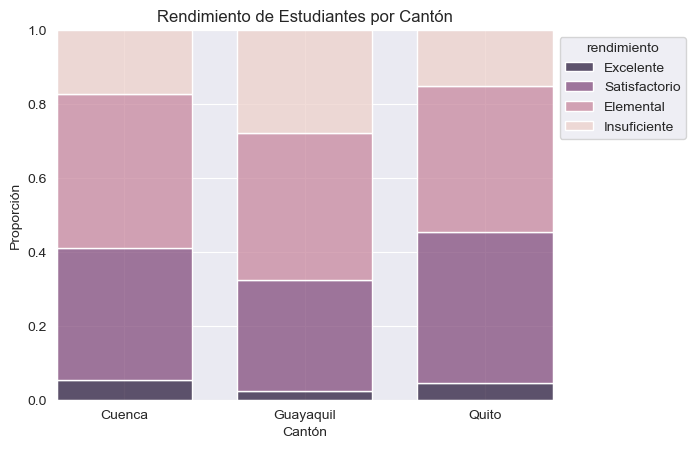

In [152]:
sns.histplot(
    data=dfCantonesGrandes,
    x="Nombre de la Cantón", hue="nl_inev",
    multiple="fill", stat="proportion",
    shrink=0.75
).set(title='Rendimiento de Estudiantes por Cantón', xlabel='Cantón', ylabel='Proporción')
plt.legend(title="rendimiento", labels=["Excelente", "Satisfactorio", "Elemental","Insuficiente"], loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [153]:
dfCanton["id_zona"].value_counts()

id_zona
8     233986
9     210777
5     199212
4     164109
3     138897
1     114956
7     111967
6     104830
2      62546
90      2040
98         1
Name: count, dtype: int64

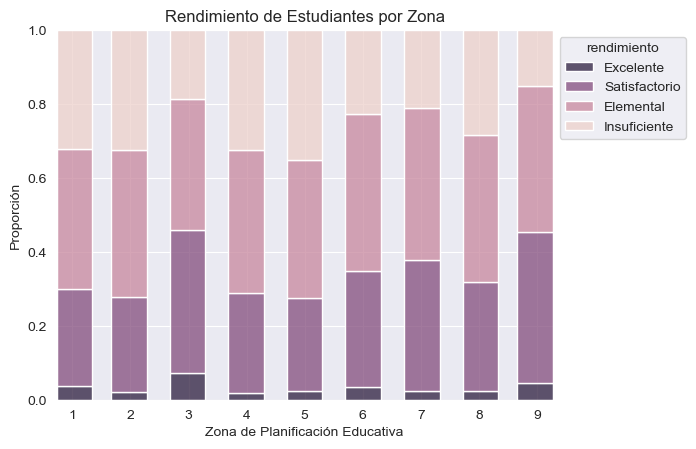

In [154]:
dfCanton = dfCanton.loc[~dfCanton["id_zona"].isin([90, 98])]
sns.histplot(
    data= dfCanton,
    x="id_zona", hue="nl_inev",
    multiple="fill", stat="proportion",
    shrink=8.5
).set(title='Rendimiento de Estudiantes por Zona', xlabel='Zona de Planificación Educativa', ylabel='Proporción')
plt.legend(title="rendimiento", labels=["Excelente", "Satisfactorio", "Elemental","Insuficiente"], loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [155]:
dfCanton["financiamiento"].value_counts()

financiamiento
1    939862
2    278373
3    123045
Name: count, dtype: int64

In [156]:
dfCanton['financiamiento'] = pd.Categorical(dfCanton['financiamiento']).rename_categories({1: 'Público', 2: 'Privado', 3: 'Mixto'})
#dfCanton = dfCanton.loc[~dfCanton["financiamiento"].isin([999999])]
#dfCanton['financiamiento'] = dfCanton['financiamiento'].cat.remove_categories([999999])
#dfCanton["financiamiento"].value_counts()

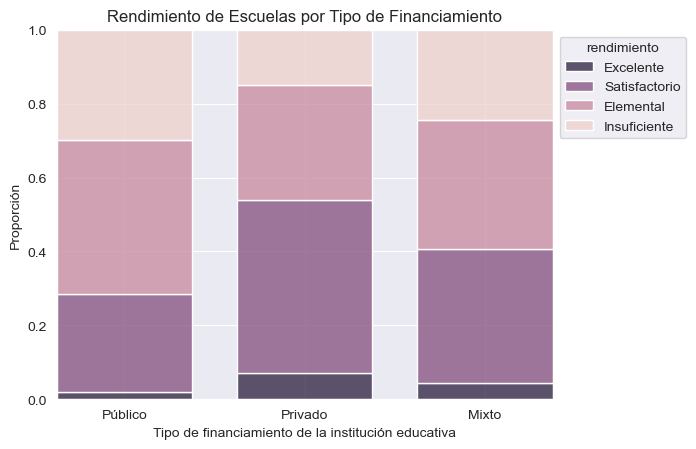

In [157]:
sns.histplot(
    data=dfCanton,
    x="financiamiento", hue="nl_inev",
    multiple="fill", stat="proportion",
    shrink=0.75
).set(title='Rendimiento de Escuelas por Tipo de Financiamiento', xlabel='Tipo de financiamiento de la institución educativa', ylabel='Proporción')
plt.legend(title="rendimiento", labels=["Excelente", "Satisfactorio", "Elemental","Insuficiente"], loc = 2, bbox_to_anchor = (1,1))
plt.show()

/Users/lurapozo/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


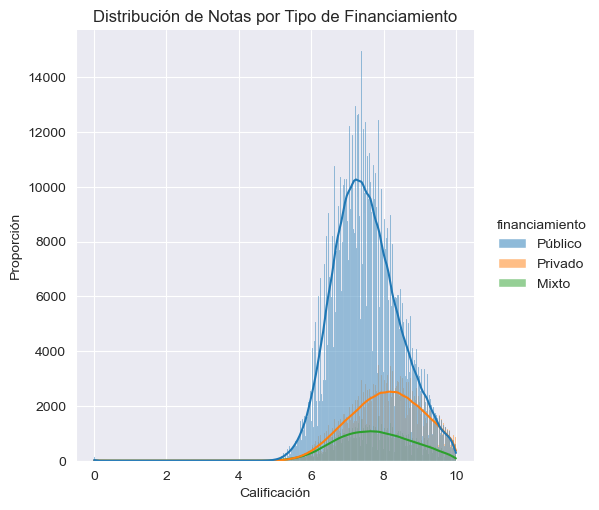

In [158]:
sns.displot(
    data=dfCanton, 
    x="inev", 
    hue="financiamiento",
    kde=True
).set(title='Distribución de Notas por Tipo de Financiamiento', xlabel='Calificación', ylabel='Proporción')
plt.show()

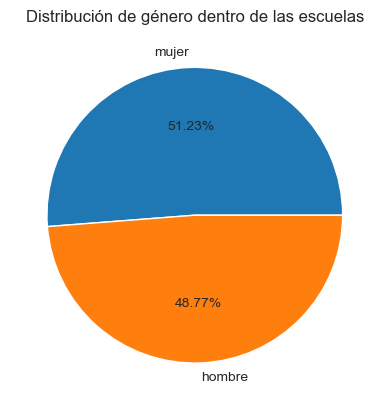

In [159]:
plt.pie(
    dfCanton['tp_sexo'].value_counts(normalize=True), 
    labels=["mujer", "hombre"], 
    autopct='%.2f%%'
)
plt.title("Distribución de género dentro de las escuelas")
plt.show()

In [160]:
dfCanton['inev'].describe()

count    1.341280e+06
mean     7.652792e+00
std      9.534415e-01
min      0.000000e+00
25%      6.960000e+00
50%      7.590000e+00
75%      8.300000e+00
max      1.000000e+01
Name: inev, dtype: float64

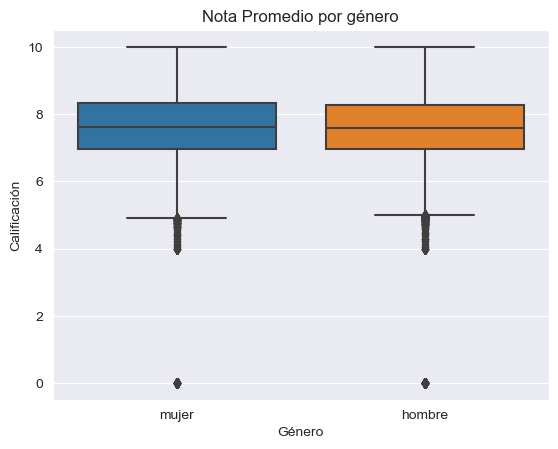

In [161]:
sns.boxplot(
    dfCanton, 
    x="tp_sexo", 
    y="inev",
).set(title='Nota Promedio por género', xlabel='Género', ylabel='Calificación', xticklabels = (["mujer", "hombre"]))

plt.show()

In [162]:
dfCanton['es_regeva'].value_counts()

es_regeva
1    739444
2    601836
Name: count, dtype: int64

In [163]:
dfCanton['quintil'].unique()

array([     2,      1,      3,      4,      5, 999999])

Quintil 1 es la población más pobre mientras que quintil 5 es la más pudente

In [164]:
dfCanton = dfCanton.loc[dfCanton['quintil'] != 999999]

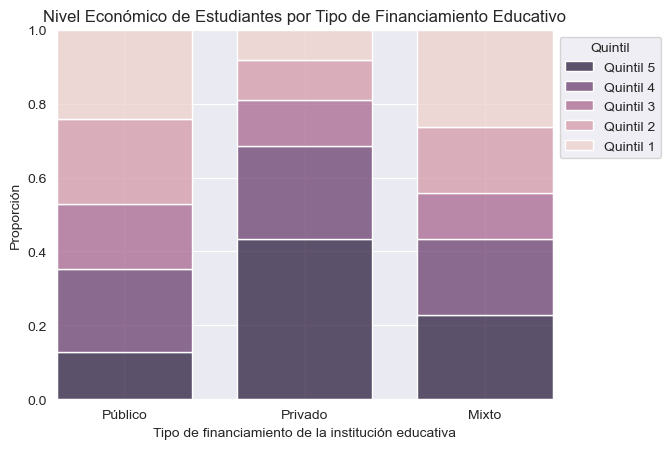

In [165]:
sns.histplot(
    data=dfCanton,
    x="financiamiento", hue="quintil",
    multiple="fill", stat="proportion",
    shrink=0.75
).set(title='Nivel Económico de Estudiantes por Tipo de Financiamiento Educativo', xlabel='Tipo de financiamiento de la institución educativa', ylabel='Proporción')
plt.legend(title="Quintil", labels=["Quintil 5", "Quintil 4", "Quintil 3","Quintil 2", "Quintil 1"], loc = 2, bbox_to_anchor = (1,1))
plt.show()

[Text(0.5, 1.0, 'Calificación Promedio por Nivel Económico y Tipo de Financiamiento')]

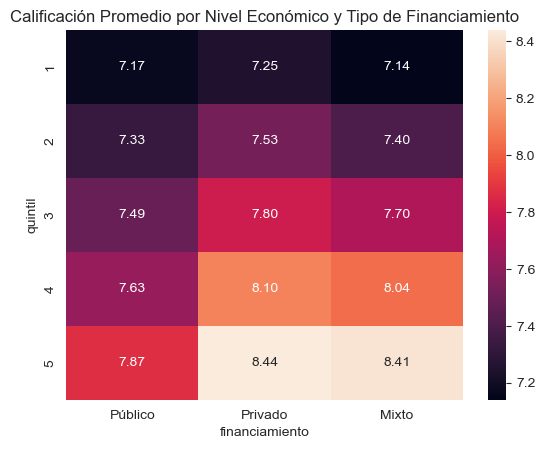

In [166]:
sns.heatmap(
    dfCanton.pivot_table(index="quintil", columns="financiamiento",values="inev", aggfunc='median'), 
    annot=True, 
    fmt='.2f'
).set(title="Calificación Promedio por Nivel Económico y Tipo de Financiamiento")

[Text(0.5, 1.0, 'Cantidad de Estudiantes por Nivel Económico y Tipo de Financiamiento')]

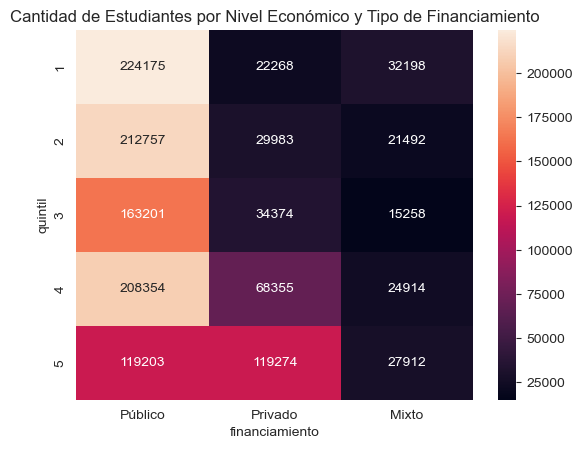

In [167]:
sns.heatmap(
    dfCanton.pivot_table(index="quintil", columns="financiamiento",values="inev", aggfunc='count'),
    annot=True,
    fmt='.0f'
).set(title="Cantidad de Estudiantes por Nivel Económico y Tipo de Financiamiento")

In [168]:
dfCanton['ciclo'].value_counts()

ciclo
2018-2019    297191
2017-2018    293867
2016-2017    264737
2015-2016    245453
2014-2015    222470
Name: count, dtype: int64

In [180]:
dfCanton['inev'].describe()

count    1.323718e+06
mean     7.653880e+00
std      9.519318e-01
min      0.000000e+00
25%      6.960000e+00
50%      7.590000e+00
75%      8.300000e+00
max      1.000000e+01
Name: inev, dtype: float64

/var/folders/hx/fcx4yqw903n270zvkg9tjlqc0000gn/T/ipykernel_2536/4088209751.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ).set(title="Promedio Anual del Exámen de Grado", xticklabels=["2014", "2015", "2016", "2017", "2018"], xlabel='Año Educativo', ylabel='Calificación')


[Text(0.5, 1.0, 'Promedio Anual del Exámen de Grado'),
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017'),
  Text(4, 0, '2018')],
 Text(0.5, 0, 'Año Educativo'),
 Text(0, 0.5, 'Calificación')]

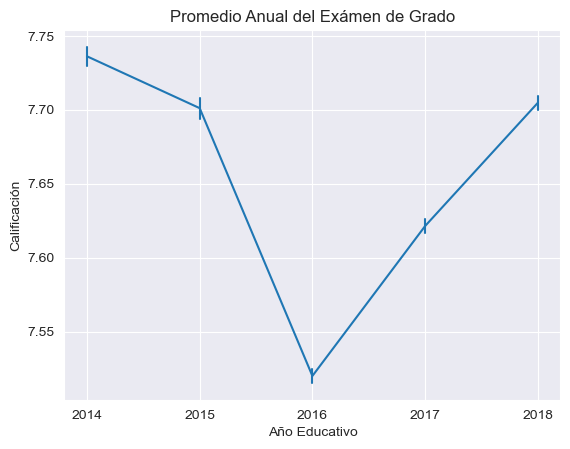

In [190]:
sns.lineplot(
    data=dfCanton, 
    x="ciclo", 
    y="inev",
    err_style="bars",
    errorbar=("se", 3)
).set(title="Promedio Anual del Exámen de Grado", xticklabels=["2014", "2015", "2016", "2017", "2018"], xlabel='Año Educativo', ylabel='Calificación')

In [170]:
dfNotas = pd.melt(dfCanton[['ciclo', 'imat', 'ilyl', 'icn', 'ies']], id_vars=['ciclo'])
dfNotas.head()

,ciclo,variable,value
0,2014-2015,imat,5.50
1,2014-2015,imat,7.75
2,2014-2015,imat,6.00
3,2014-2015,imat,6.50
4,2014-2015,imat,7.00


In [174]:
dfNotas.pivot_table(index="ciclo", columns="variable",values="value", aggfunc='mean')

variable,icn,ies,ilyl,imat
ciclo,,,,
2014-2015,322.222336,322.803478,610.260774,609.593341
2015-2016,7.458917,8.338791,7.703022,7.298531
2016-2017,7.327094,7.523555,7.898379,7.325707
2017-2018,7.545322,7.658073,7.808582,7.468494
2018-2019,44.657667,44.633105,44.831989,44.755029


In [175]:
dfNotas['value'].describe()

count    5.294872e+06
mean     9.301822e+01
std      9.238878e+03
min      0.000000e+00
25%      7.000000e+00
50%      7.670000e+00
75%      8.500000e+00
max      9.999990e+05
Name: value, dtype: float64

In [178]:
dfNotas = dfNotas.loc[dfNotas['value'] != 999999]

/var/folders/hx/fcx4yqw903n270zvkg9tjlqc0000gn/T/ipykernel_2536/4210289659.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ).set(title="Calificación promedo por Dominio del Exámen de Grado", xticklabels=["2014", "2015", "2016", "2017", "2018"], xlabel='Año Educativo', ylabel='Calificación')


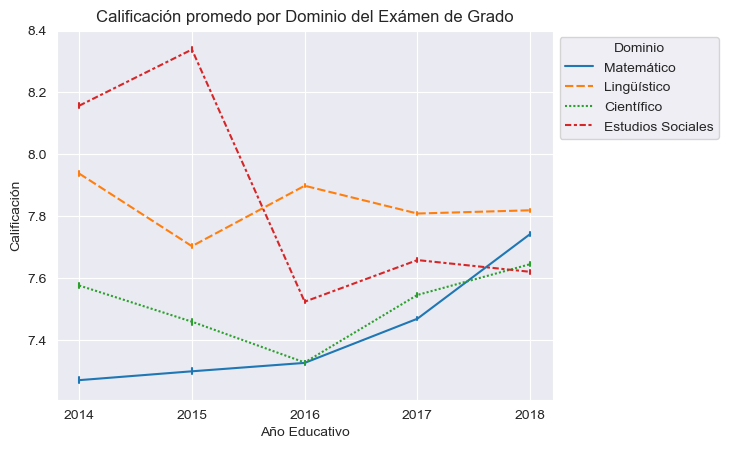

In [191]:
sns.lineplot(
    data=dfNotas,
    x="ciclo",
    y="value",
    hue="variable",
    style="variable",
    err_style="bars",
    errorbar=("se", 3)
).set(title="Calificación Promedio por Dominio del Exámen de Grado", xticklabels=["2014", "2015", "2016", "2017", "2018"], xlabel='Año Educativo', ylabel='Calificación')
plt.legend(title="Dominio", labels=["Matemático", "Lingüístico", "Científico", "Estudios Sociales"], loc = 2, bbox_to_anchor = (1,1))
plt.show()